<a href="https://colab.research.google.com/github/RoseMwangi98/E_COMMERCE-ANALYSIS/blob/main/ECOMMERCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement

### 1.1.Defining the Question

Characterize the behavior of the Kira Plastinina brand customers using unsupervised learning techniques and provide recommendations and insights to the company based on my findings.

### 1.2.Metric for Success

To build a model that can accurately characterize the customers behavior and to relay  my findings based on the results of my model.


### 1.3. The Context

Kira Plastinina('https://kiraplastinina.com/company_information/') is a Brand of Fashionable Designer clothes marketed primarily to young women and sold across several countries namely Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia.
The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.
Therefore as the researcher I am tasked with analyzing the data and providing insights and recommendations to the company based on my findings.


### 1.4.The Experimental Design Taken

I carried out my analysis gradually ,starting with the problem statement , I then imported the dataset and performed data cleaning , I then carried out my EDA and built my model , finally after doing so I challenged my solution and then finished with providing recommendations based on the findings of my analysis.




## 2.Data Sourcing

The data was provided by the company's Sales and Marketing team and can be found at this link(http://bit.ly/EcommerceCustomersDataset).


In [2]:
# import the library needed
library(devtools)
install_github("vqv/ggbiplot", force = TRUE)
install.packages("DataExplorer") 
install.packages("Hmisc")
install.packages("pastecs")
install.packages("psych")
install.packages("corrplot")
install.packages("factoextra")
install.packages("Rtsne")
install.packages("caret")

Loading required package: usethis




pillar (1.6.0 -> 1.6.1) [CRAN]
fansi  (0.4.2 -> 0.5.0) [CRAN]
tibble (3.1.1 -> 3.1.2) [CRAN]
plyr   (NA    -> 1.8.6) [CRAN]


Installing 4 packages: pillar, fansi, tibble, plyr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpdbWL7T/remotes3b5193f67a/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘R

In [3]:
# Loading Libraries necessary

library(tidyverse)
library(magrittr)
library(warn = -1)

library(ggbiplot)
library(RColorBrewer)
library(ggplot2)
library(lattice)
library(corrplot)

library(DataExplorer)
library(Hmisc)
library(pastecs)
library(psych)
library(factoextra)
library(Rtsne)
library(caret)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

---------------------------------------------

In [4]:
#load the dataset
commerce=read_csv('http://bit.ly/EcommerceCustomersDataset')
head(commerce)


── Column specification ────────────────────────────────────────────────────────
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)




Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [5]:
glimpse(commerce)

Rows: 12,330
Columns: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2…
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, 2…
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627.…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05000…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14000…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, 0…
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Feb…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1…
$ Browser      

In [6]:
summary(commerce)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

**DATA CLEANING**

In [7]:
colSums(is.na(commerce))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [8]:
rowSums(is.na(commerce))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8
 [1477] 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [9]:
# Omitting the null values from my dataset
commerce <- na.omit(commerce)
colSums(is.na(commerce))
dim(commerce)

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

[1] 12316    18

In [10]:

# Confirming that we have no null values

sum(colSums(is.na(commerce)))

[1] 0

In [11]:
# Checking for duplicates
sum(duplicated(commerce))
dup_records <- duplicated(commerce)
sum(dup_records)

[1] 117

[1] 117

In [12]:
# removing the duplicates
# Removing the duplicated records
commerce <- commerce[!duplicated(commerce), ]
dim(commerce)

[1] 12199    18

In [13]:

dup_records <- duplicated(commerce)
sum(dup_records)

[1] 0

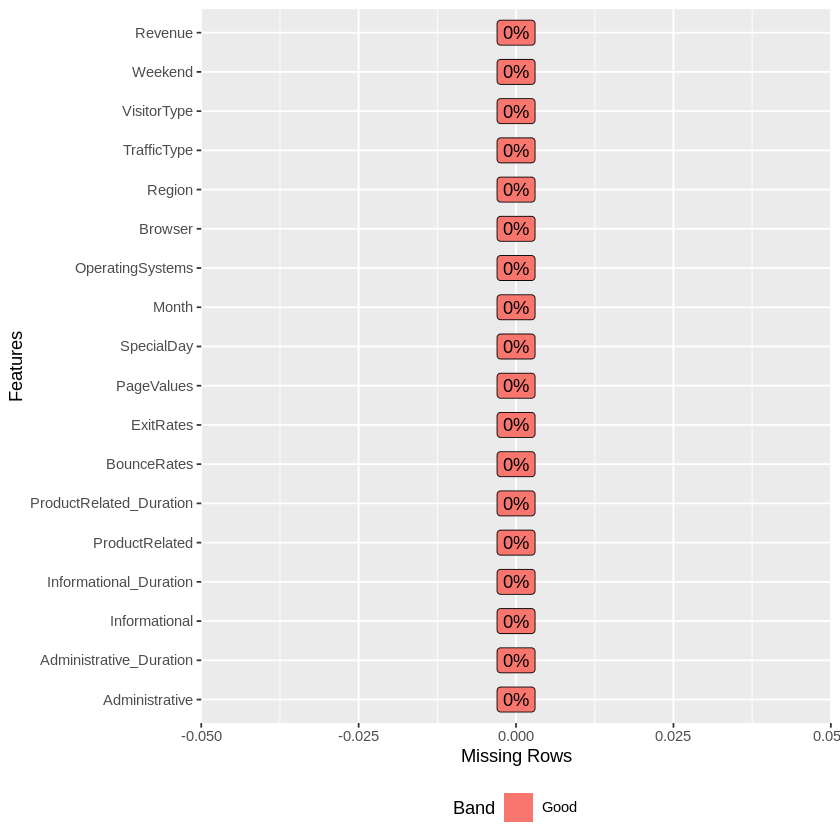

In [20]:
plot_missing(commerce)

## 5. Exploratory Data Analysis
#### Administrative Variable


In [14]:
library(psych)
library("ggpubr")


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




In [15]:
desc <- describe(commerce$Administrative)
desc

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,12199,2.340028,3.330851,1,1.656593,1.4826,0,27,27,1.946009,4.634854,0.03015735


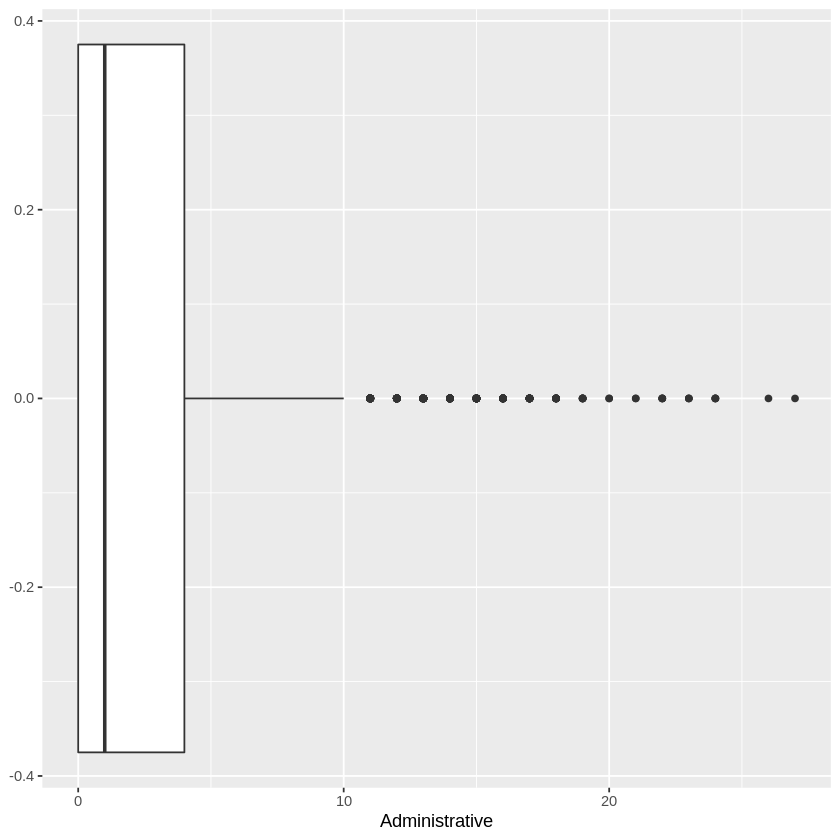

$`1`

$`2`

$`3`

attr(,"class")
[1] "list"      "ggarrange"

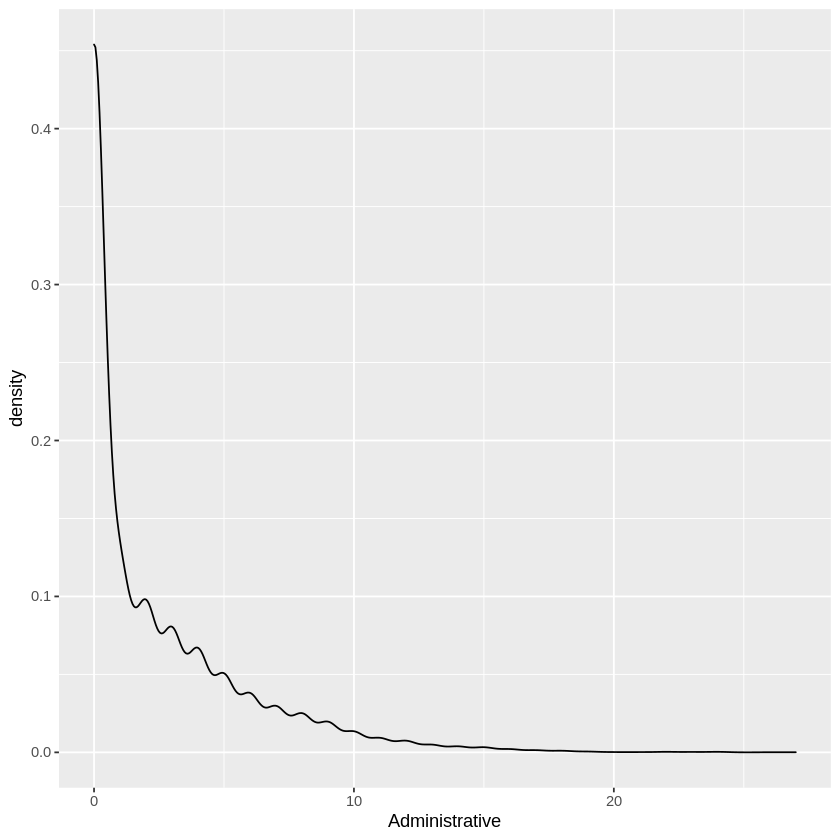

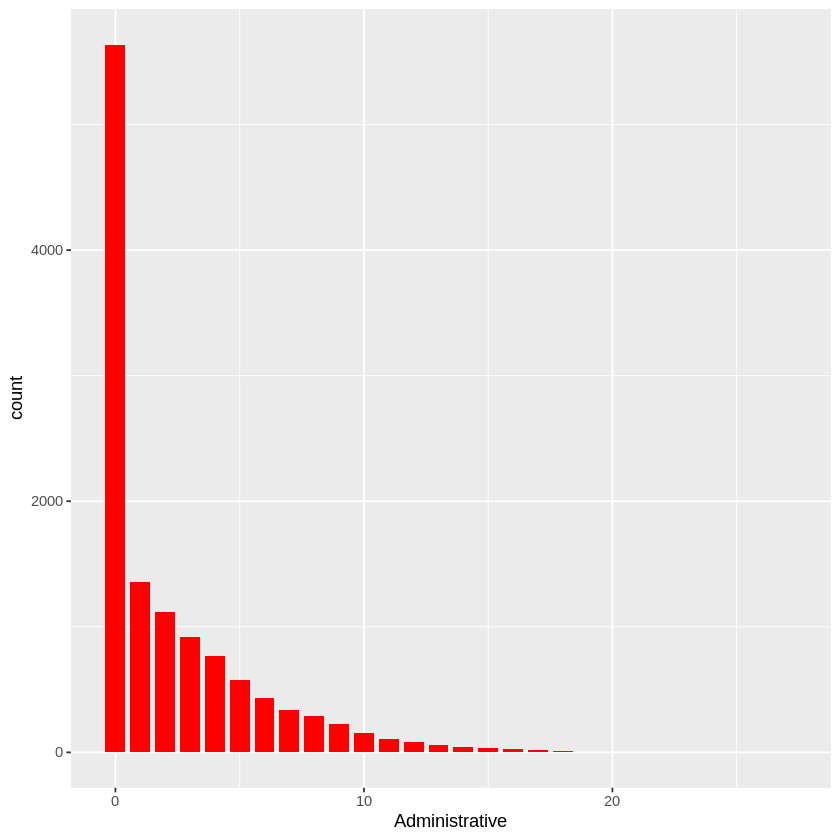

In [16]:

p1 <- ggplot(commerce) + geom_boxplot(aes(Administrative))
p2 <- ggplot(commerce,aes(Administrative)) + geom_bar(fill= "red",width= 0.8)#+ coord_flip()
p3 <- ggplot(commerce) + geom_density(aes(Administrative))
figure <- ggarrange(p1, p3, p2,
                     widths = c(40,40),
                    heights = c(40,40),
                    ncol = 1, nrow = 1)
figure

+ The mean number of Administrative pages visited by users was 2.34  , with the median value being 1. 
+ There were outliers in this column. However being that majority of users visited zero such pages , this was  not an alarming  factor.
+ The range of the variable was 27 , with the min value being 0 ,plotting a barplot for this variable we see that in excess of 5,500 users visited zero Administrative pages.
+ The column is highly skewed with a value of 1.95 and can be characterized as Leptokurtic with a value of 4.63, this could be attributed to the outliers in the column.

**#### Administrative Duration** 

This column records the amount of time a user spent on  an Administrative site.

In [39]:
desc <- describe(commerce$Administrative_Duration)
print(desc)

   vars     n  mean     sd median trimmed   mad min     max   range skew
X1    1 12199 81.68 177.53      9   42.87 13.34  -1 3398.75 3399.75 5.59
   kurtosis   se
X1    50.09 1.61


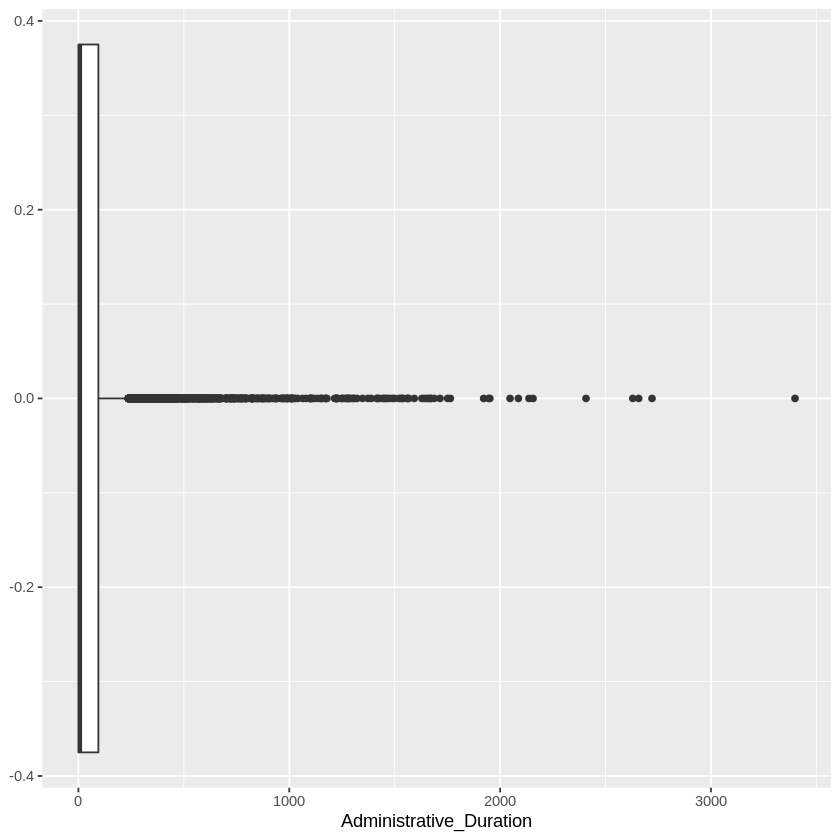

$`1`

$`2`

$`3`

attr(,"class")
[1] "list"      "ggarrange"

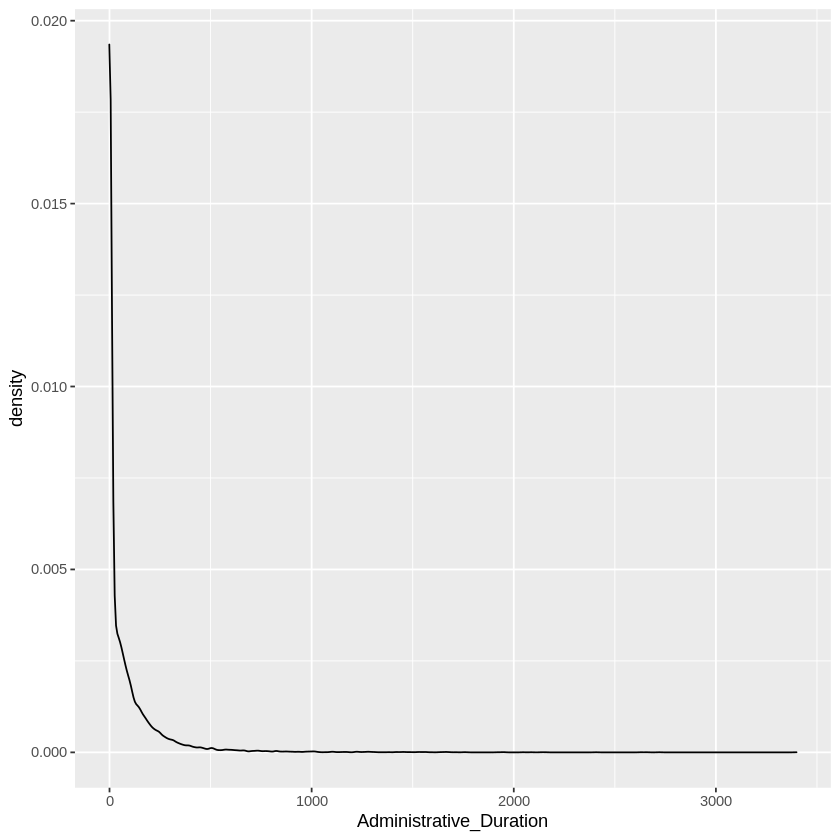

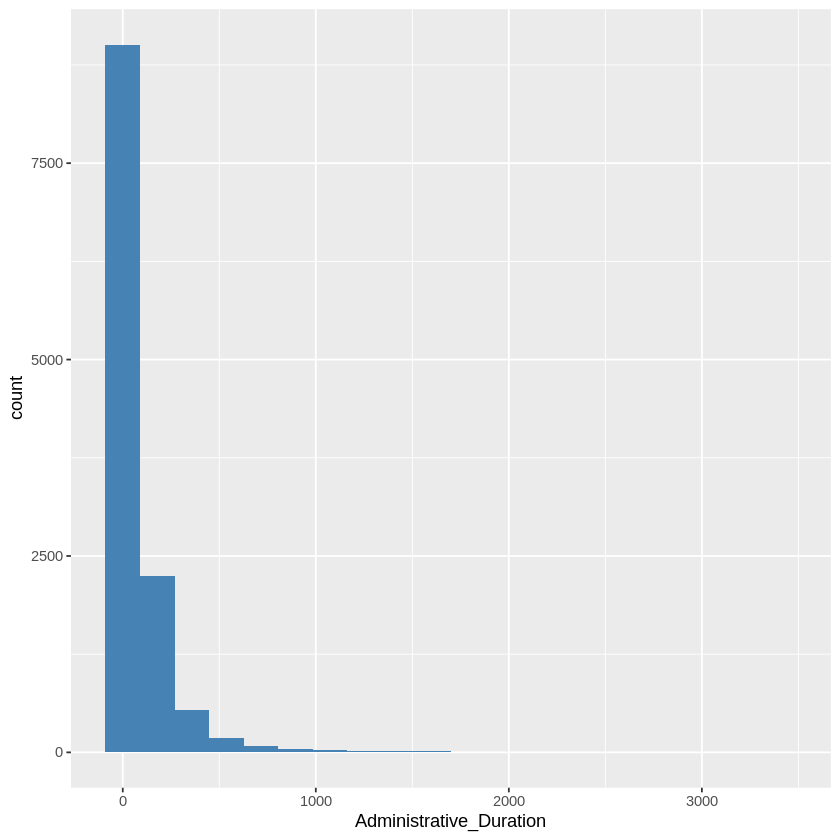

In [42]:


p1 <- ggplot(commerce) + geom_boxplot(aes(Administrative_Duration))
p2 <- ggplot(commerce,aes(Administrative_Duration)) + geom_histogram(fill= "steelblue",bins=20)#+ coord_flip()
p3 <- ggplot(commerce) + geom_density(aes(Administrative_Duration))
figure <- ggarrange(p1, p3, p2,
                     widths = c(20,20),
                    heights = c(20,20),
                    ncol = 1, nrow = 1)
figure

+ On average users spent 81.68 minutes on Administrative Sites ,with the median amount of time being 9 minutes.
+ The variable had very many outliers as seen on the boxplot , however given that there was  a high range and many users spent almost almost no time on the site , therefore I did not drop these values.

#### **Informational** 

This column represents the number of Informational Pages visited by the user.





   vars     n mean   sd median trimmed mad min max range skew kurtosis   se
X1    1 12199 0.51 1.28      0    0.18   0   0  24    24 4.01    26.64 0.01


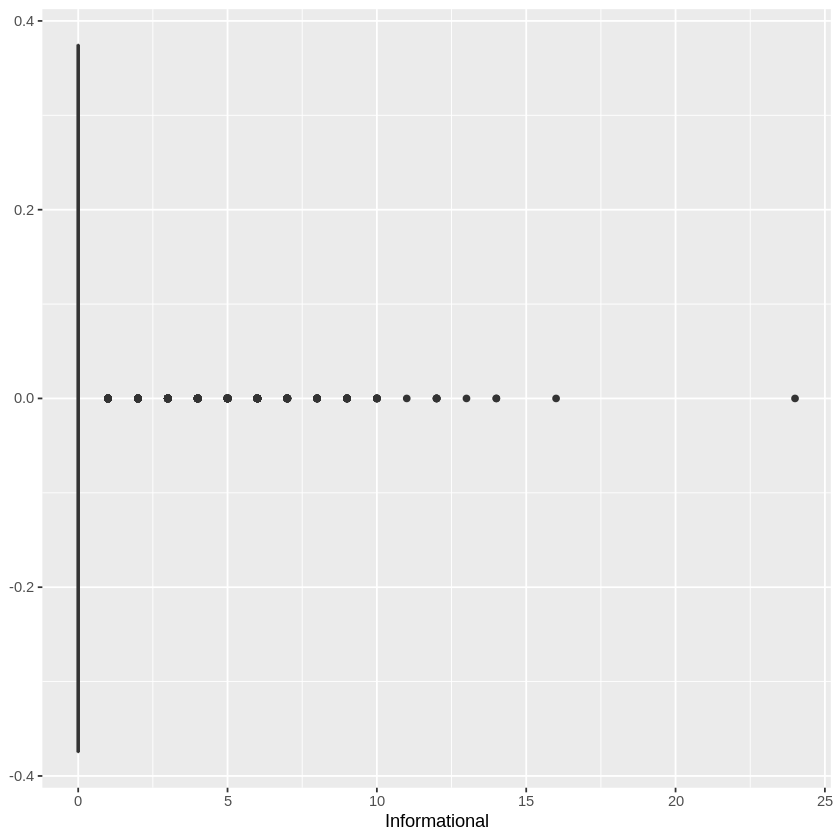

$`1`

$`2`

$`3`

attr(,"class")
[1] "list"      "ggarrange"

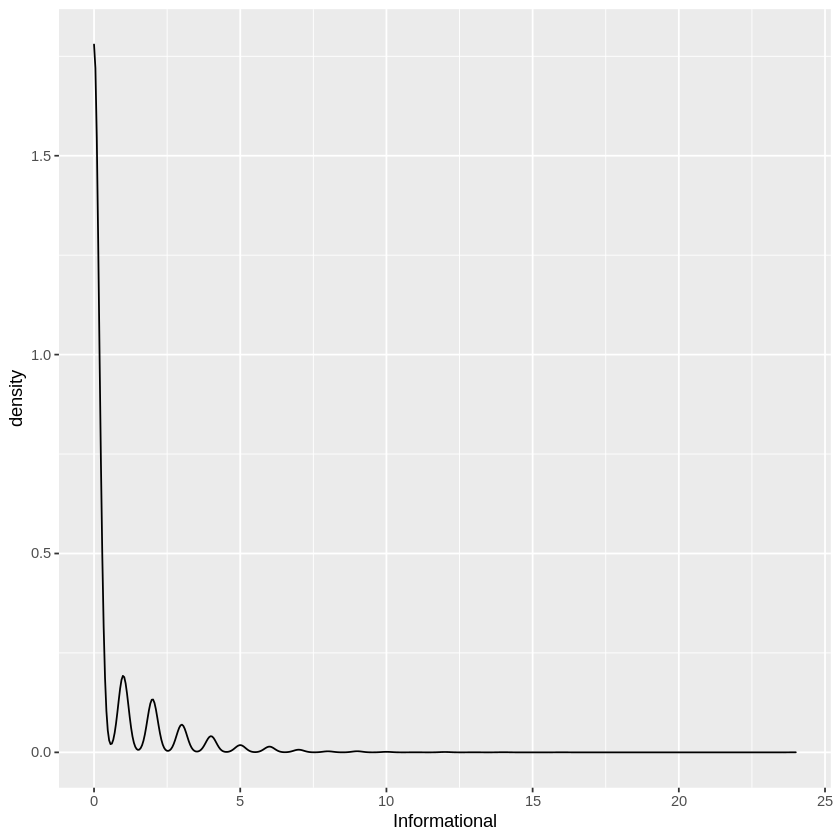

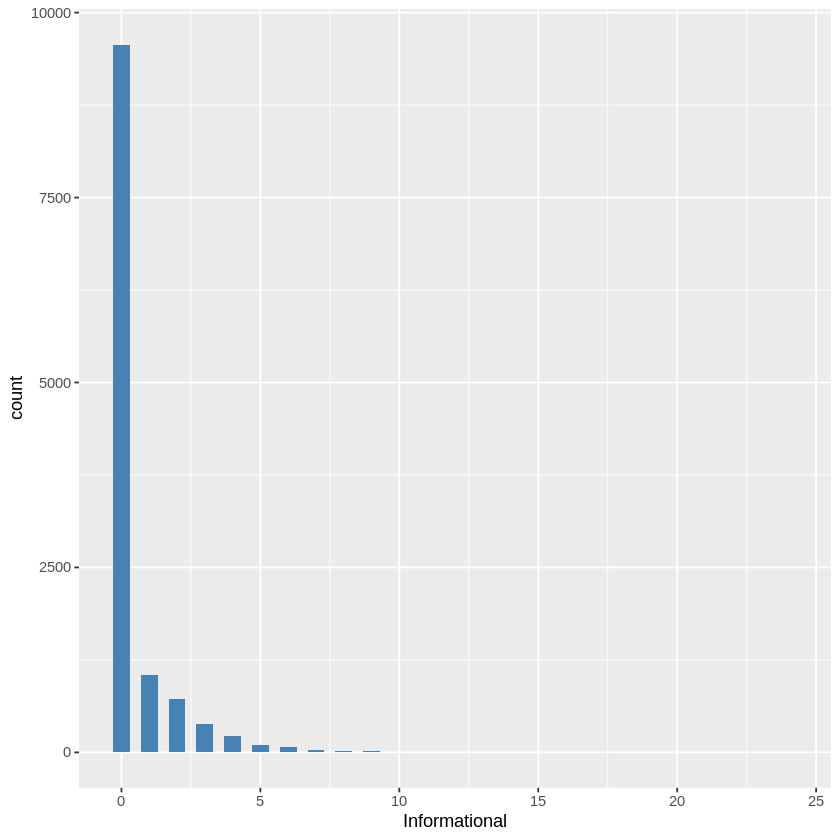

In [46]:

desc <- describe(commerce$Informational)
print(desc)

p1 <- ggplot(commerce) + geom_boxplot(aes(Informational))
p2 <- ggplot(commerce,aes(Informational)) + geom_bar(fill= "steelblue",width= 0.6)#+ coord_flip()
p3 <- ggplot(commerce) + geom_density(aes(Informational))
figure <- ggarrange(p1, p3, p2,
                     widths = c(20,20),
                    heights = c(20,20),
                    ncol = 1, nrow = 1)
figure


+ The average number of Informational Pages frequented by users was 0.51 and the median value was 0.
+ From the barplot we can see that almost 10,000 users from a population of over 12,000 visited zero informational pages .
+ Therefore this behavious causes the variable to have several outliers and behave in a leptokurtic nature with the kurtosis value being 26.64.
The variable is also highly skewed at 4.01

**Informational Duration**


This column records the amount of time users spent on Informational Sites on the internet.

   vars     n  mean     sd median trimmed mad min     max   range skew kurtosis
X1    1 12199 34.84 141.46      0    3.73   0  -1 2549.38 2550.38 7.54    75.45
     se
X1 1.28


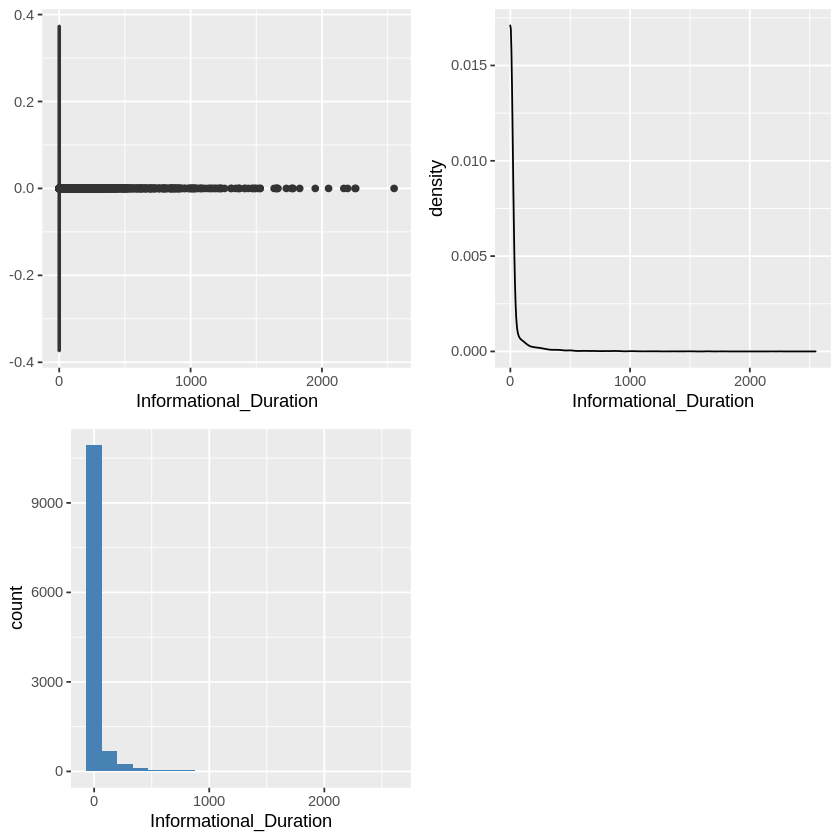

In [18]:

 
desc <- describe(commerce$Informational_Duration)
print(desc)

p1 <- ggplot(commerce) + geom_boxplot(aes(Informational_Duration))
p2 <- ggplot(commerce,aes(Informational_Duration)) + geom_histogram(fill= "steelblue",bins=20)#+ coord_flip()
p3 <- ggplot(commerce) + geom_density(aes(Informational_Duration))
figure <- ggarrange(p1, p3, p2,
                     widths = c(20,20),
                    heights = c(20,20),
                    ncol = 2, nrow = 2)
figure

In [19]:
str(commerce)

tibble[,18] [12,199 × 18] (S3: tbl_df/tbl/data.frame)
 $ Administrative         : num [1:12199] 0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num [1:12199] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num [1:12199] 0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num [1:12199] 0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num [1:12199] 1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num [1:12199] 0 64 -1 2.67 627.5 ...
 $ BounceRates            : num [1:12199] 0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num [1:12199] 0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num [1:12199] 0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num [1:12199] 0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr [1:12199] "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : num [1:12199] 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : num [1:12199] 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : num [1:12199] 1 1 9 2 1 1 3 1 2 1 ...
 $ 

**Product Related**

This was the number of ProductRelated sites that users visited.

   vars     n  mean   sd median trimmed   mad min max range skew kurtosis  se
X1    1 12199 32.06 44.6     18   23.06 19.27   0 705   705 4.33    31.04 0.4


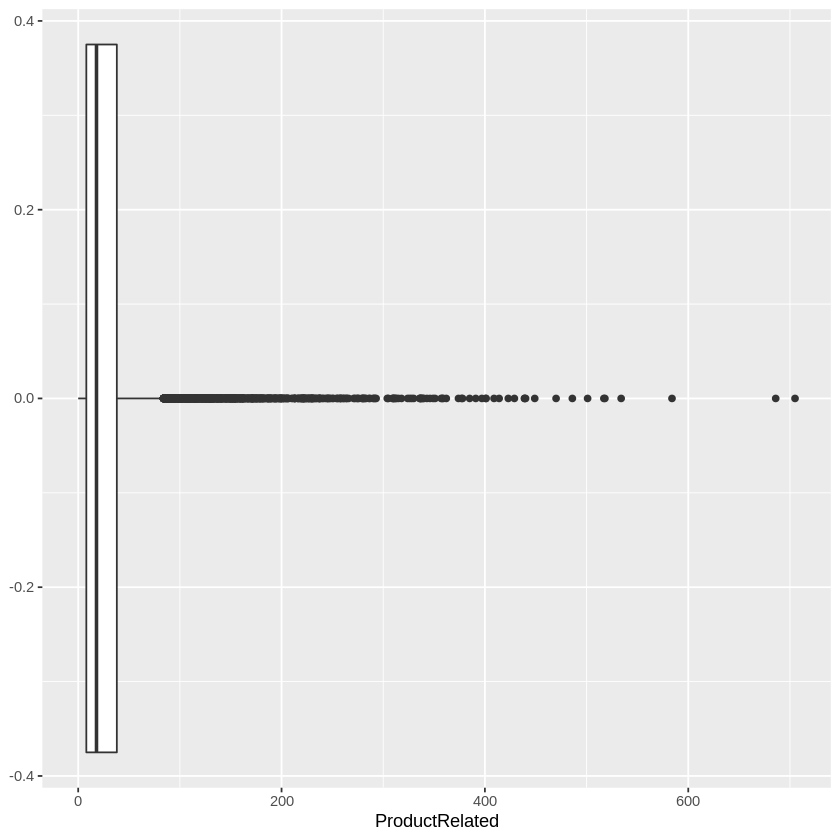

$`1`

$`2`

$`3`

attr(,"class")
[1] "list"      "ggarrange"

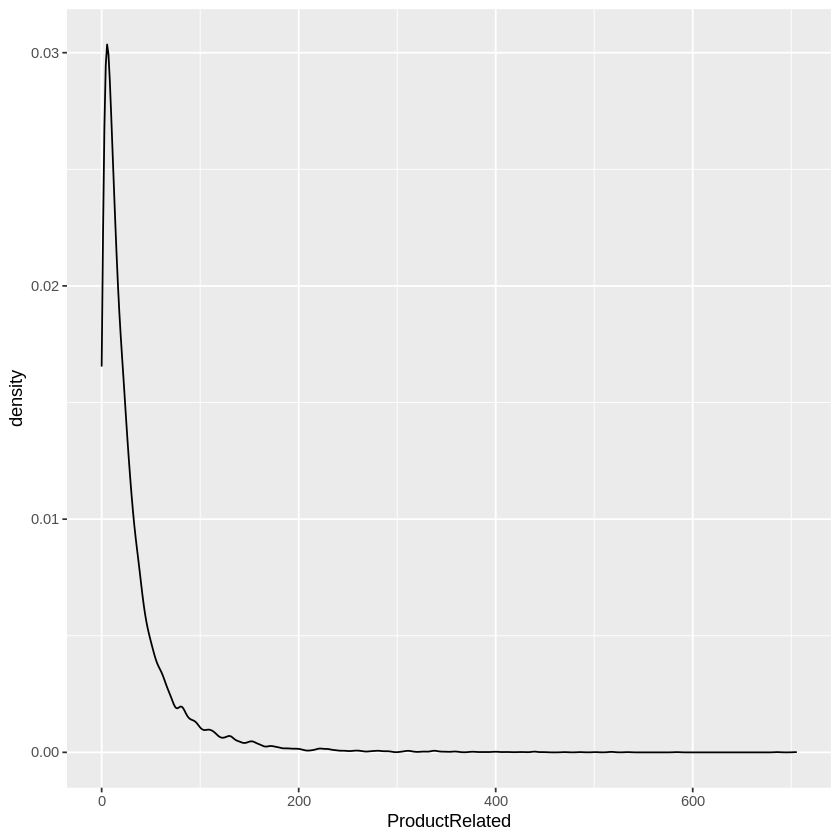

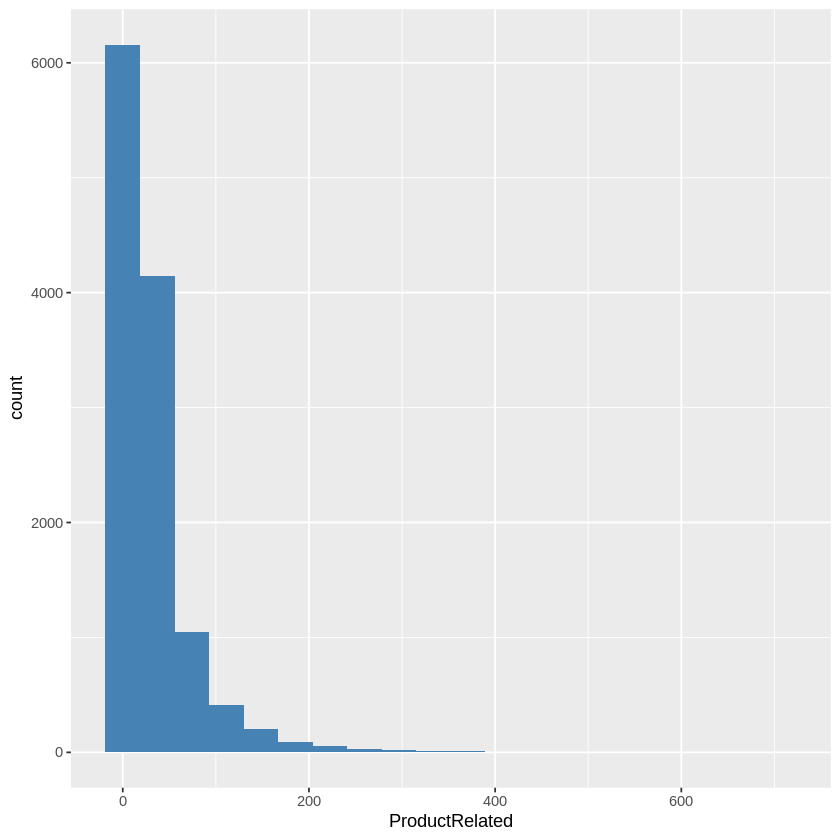

In [22]:
desc <- describe(commerce $ ProductRelated)

print(desc)


p1 <- ggplot(commerce) + geom_boxplot(aes(ProductRelated))
p2 <- ggplot(commerce,aes(ProductRelated)) + geom_histogram(fill= "steelblue",bins=20)#+ coord_flip()
p3 <- ggplot(commerce) + geom_density(aes(ProductRelated))
figure <- ggarrange(p1, p3, p2,
                     widths = c(20,20),
                    heights = c(20,20),
                    ncol = 1, nrow = 1)
figure

**REGION**

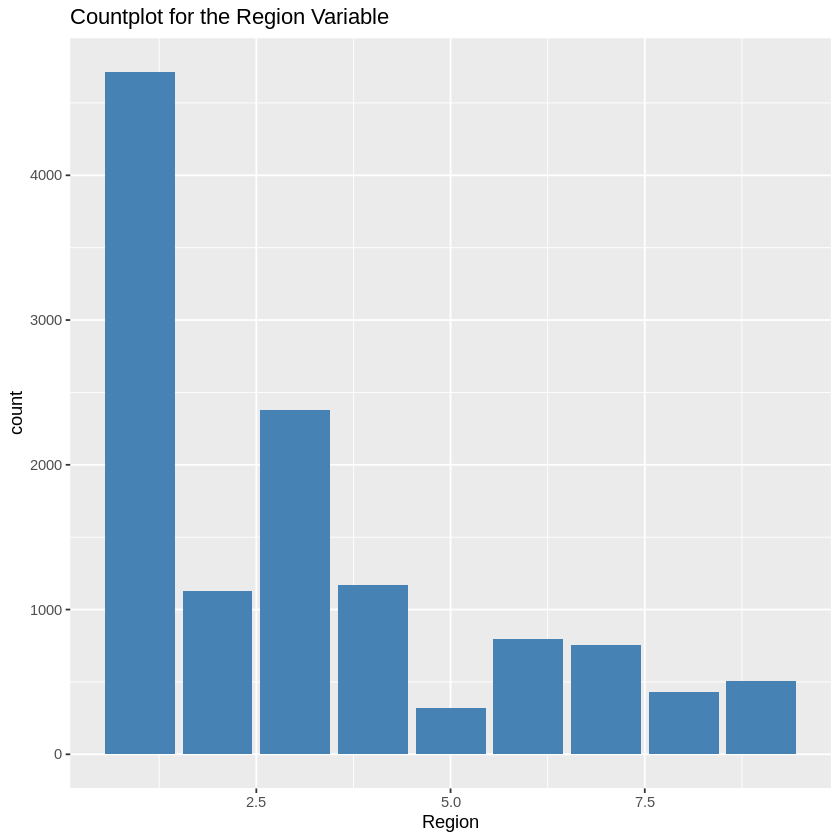

In [23]:
ggplot(commerce, aes(x=Region)) + geom_bar(fill= "steelblue")+labs(title='Countplot for the Region Variable')

**OPERATING SYSTEMS**

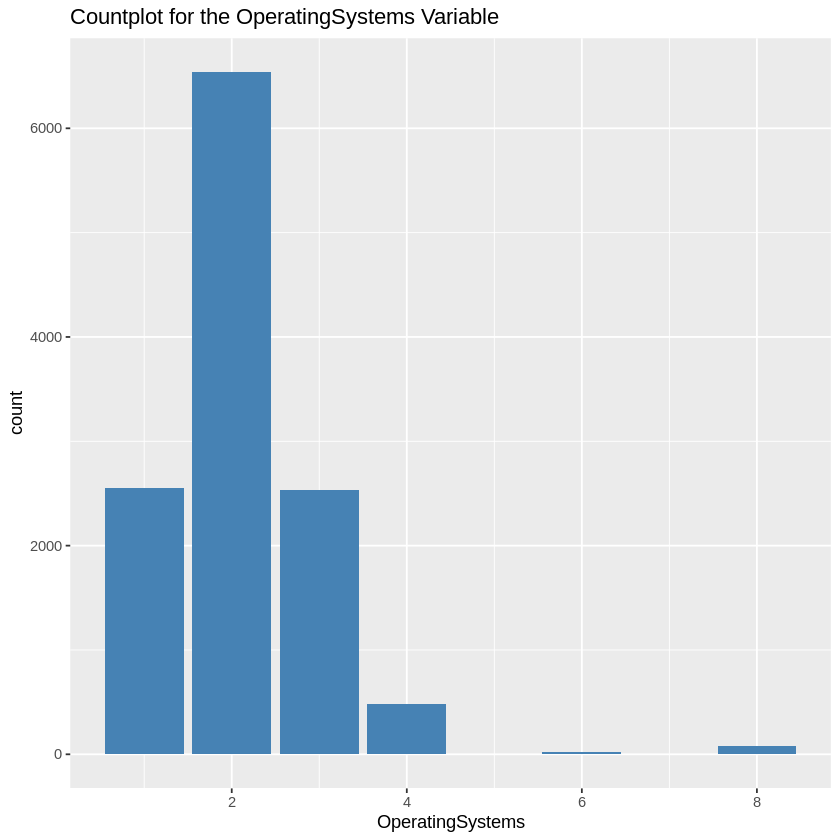

In [25]:

ggplot(commerce, aes(x=OperatingSystems)) + geom_bar(fill= "steelblue")+labs(title='Countplot for the OperatingSystems Variable')

**BROWSER**

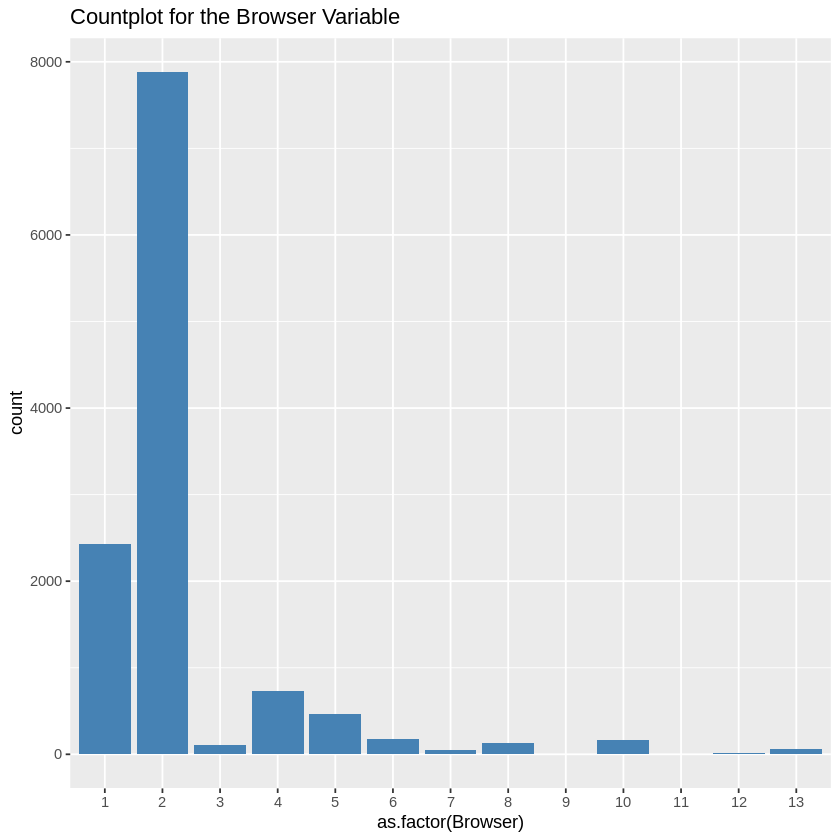

In [24]:

ggplot(commerce, aes(x=as.factor(Browser))) + geom_bar(fill= "steelblue")+labs(title='Countplot for the Browser Variable')

#### VisitorType

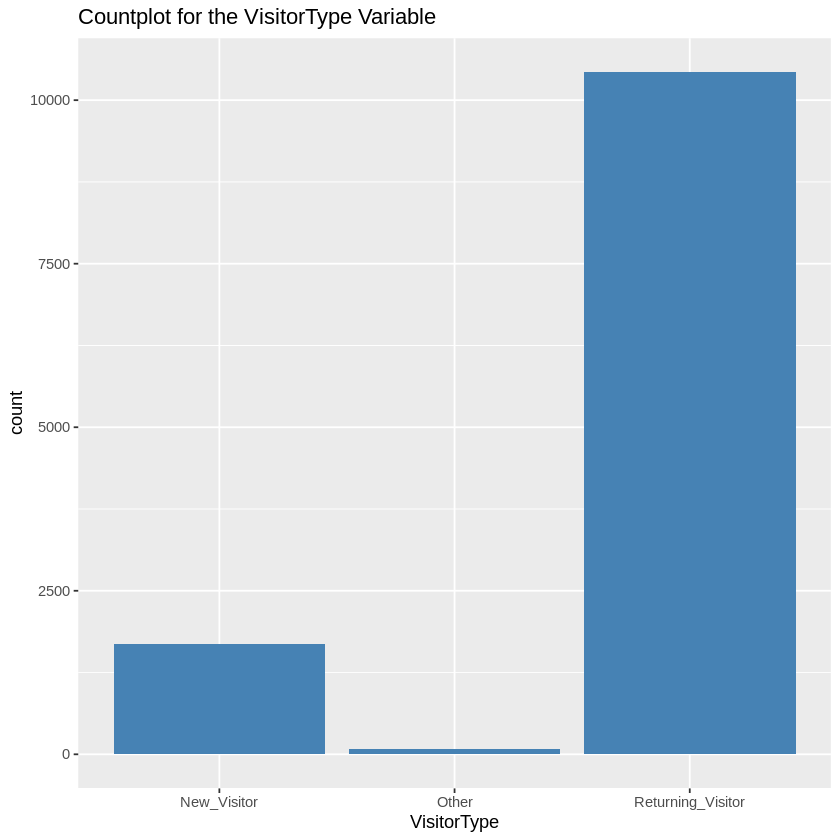

In [26]:
ggplot(commerce, aes(x=VisitorType)) + geom_bar(fill= "steelblue")+labs(title='Countplot for the VisitorType Variable')

**WEEKEND**

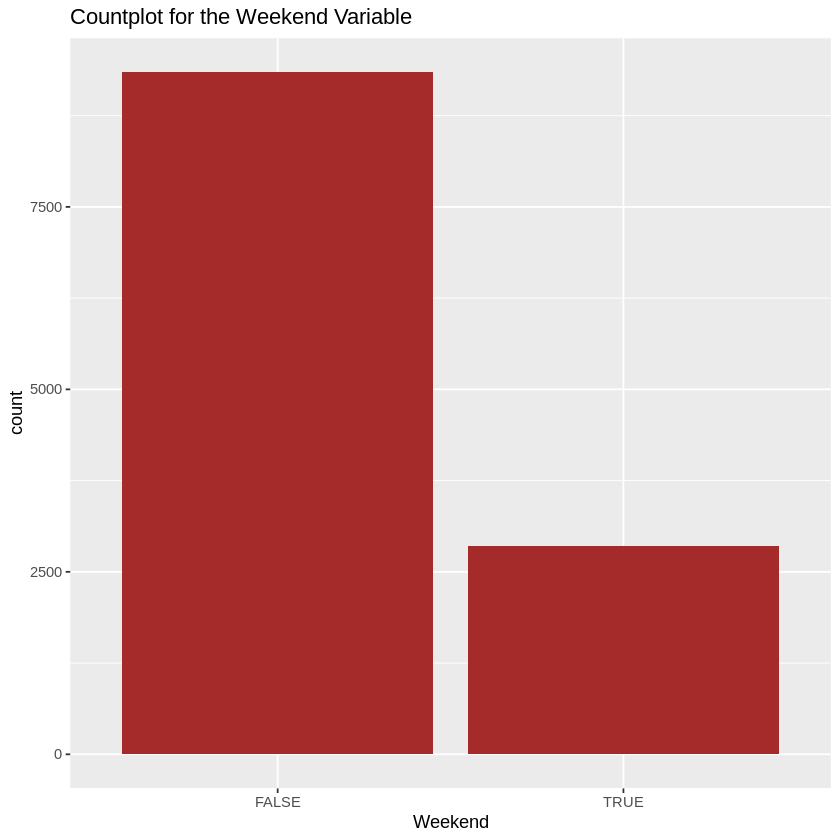

In [31]:
ggplot(commerce, aes(x=Weekend)) + geom_bar(fill= "brown")+ labs(title='Countplot for the Weekend Variable')

**REVENUE**

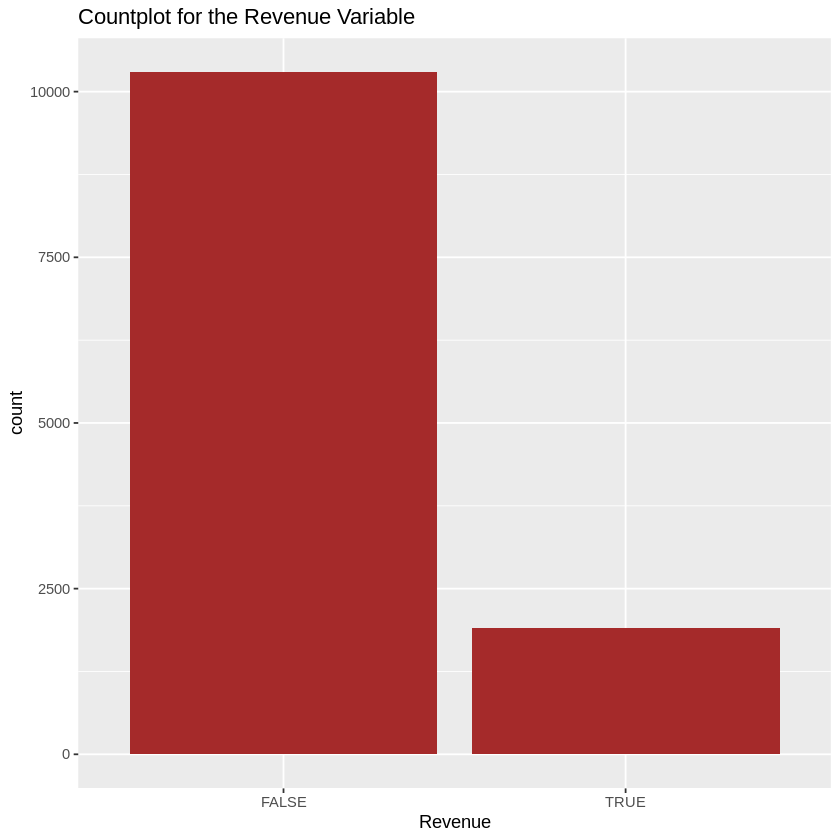

In [32]:
ggplot(commerce, aes(x=Revenue)) + geom_bar(fill= "brown")+labs(title='Countplot for the Revenue Variable')

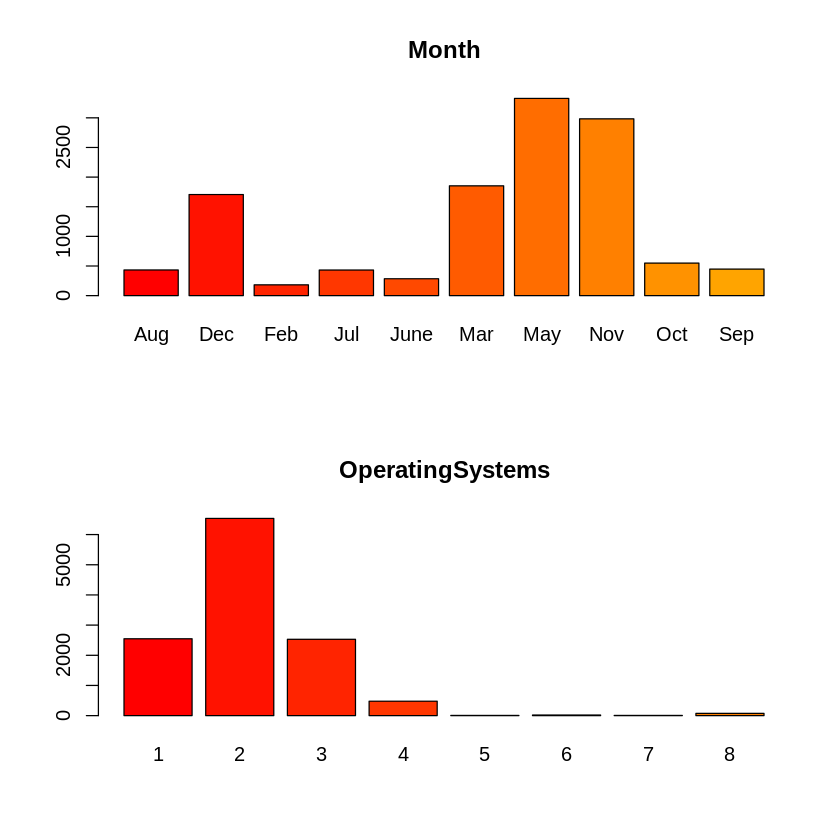

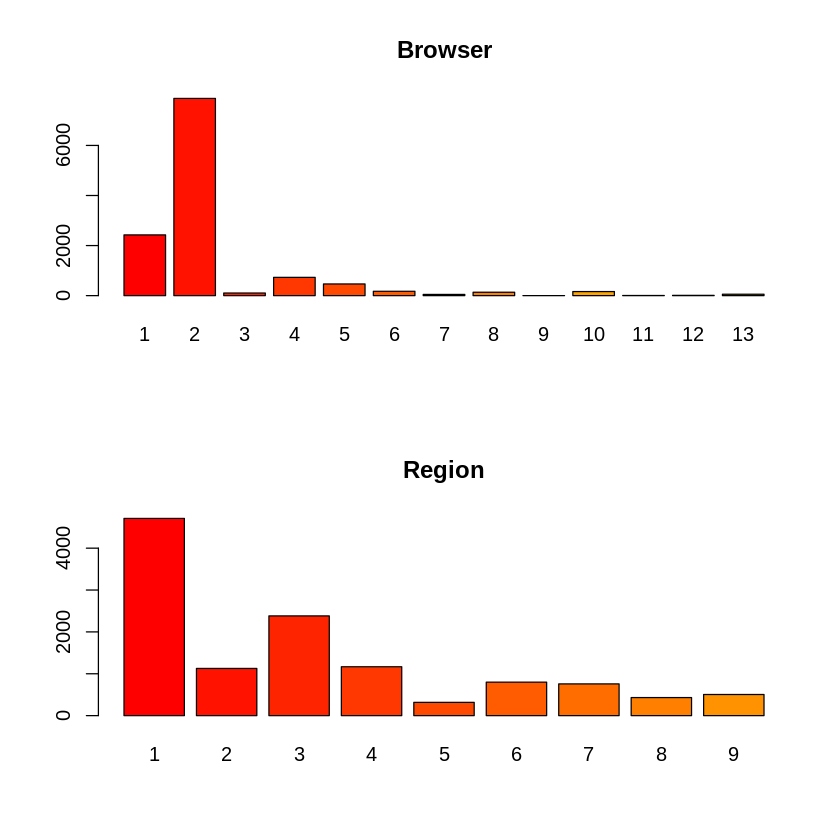

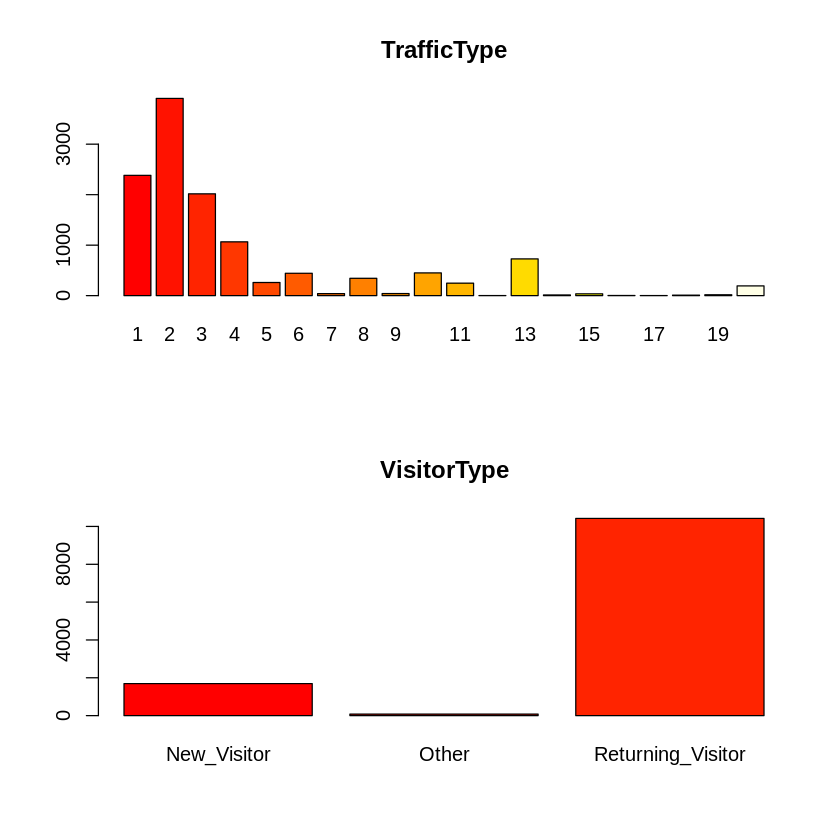

In [41]:
# Bar plots of the categorical/factor modes variables
par(mfrow=c(2,1))
for(i in 11:16) {
	counts <- table(commerce[,i])
	name <- names(commerce)[i]
	barplot(counts, main=name, col = heat.colors(20))}

From our analysis of the categorical variable,we realised the following:

May and November were busy months receiving high traffic, Feb received the least traffic of customers.

Most vistors were returning type.

Traffic mode number 2, 1 and 3 were heavily used in that order.

Region number 1 had the most activity, region 5 was less active.

Browser 2 and 1 were the most commonly used for browsing.

Operating systems 2, 1 and 3 were mostly used by customers.

 ## **BIVARIATE ANALYSIS**

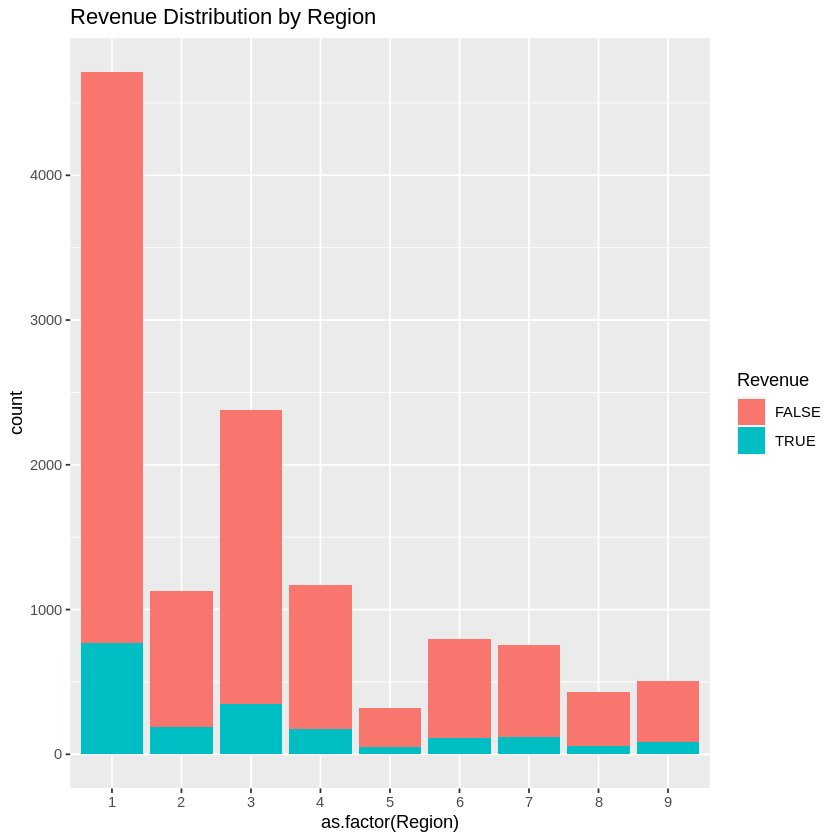

In [33]:
#revenue distribution by region
ggplot(commerce, aes(x=as.factor(Region))) + geom_bar(aes(fill= `Revenue`)) + labs(title='Revenue Distribution by Region')

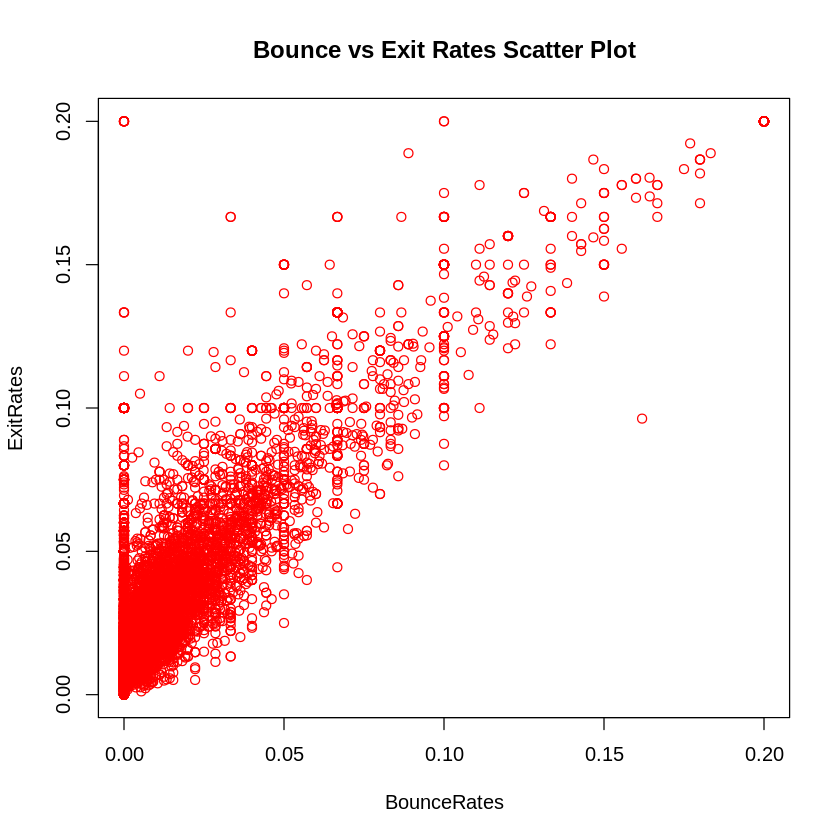

In [44]:
# Plotting a scatter plot using the plot() method

plot(ExitRates ~ BounceRates, data = commerce, 
      col = "red",
      main = "Bounce vs Exit Rates Scatter Plot")

More visitors existed the system before it trigged an ad.

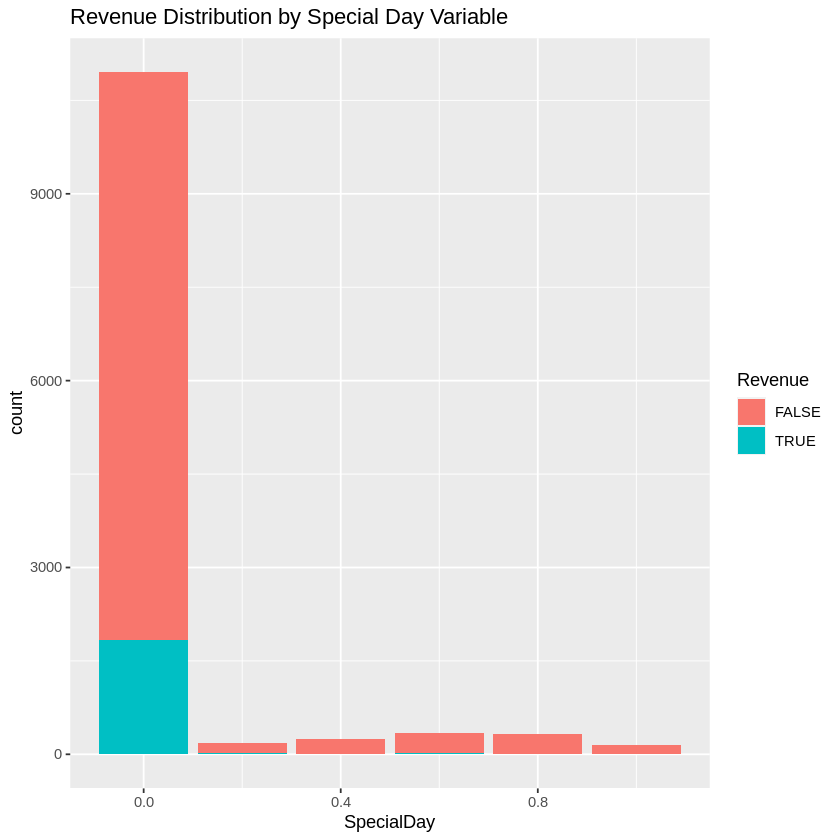

In [45]:
#revenue distribution by special days.
ggplot(commerce, aes(x=SpecialDay)) + geom_bar(aes(fill= `Revenue`))+labs(title='Revenue Distribution by Special Day Variable')


Most of the purchase were made in non-special days

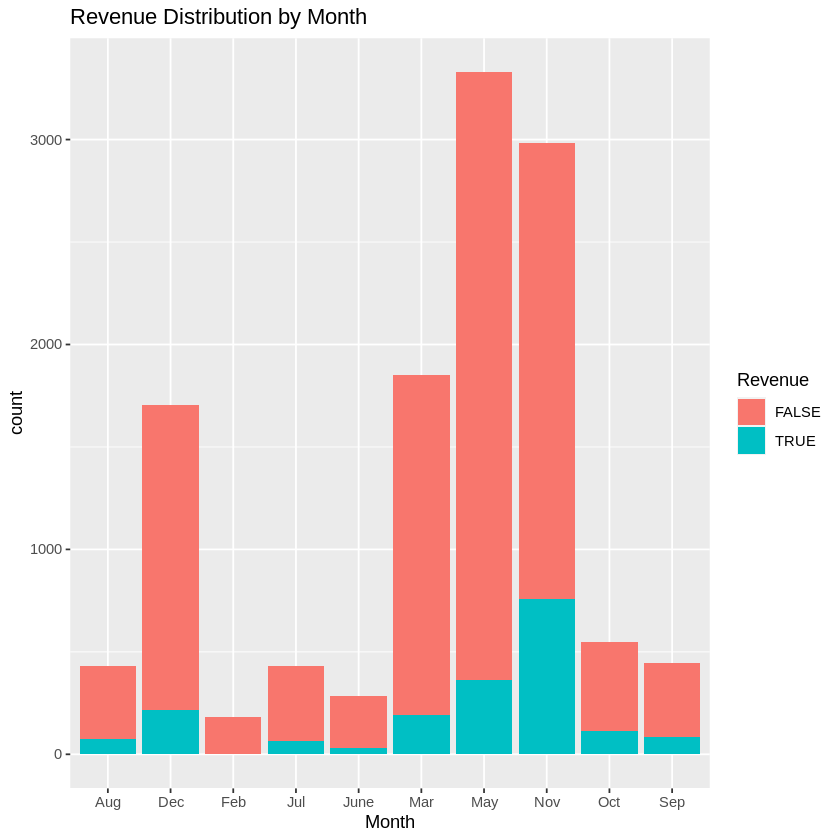

In [47]:
#revenue by each month
ggplot(commerce, aes(x=Month )) + geom_bar(aes(fill= `Revenue`))+labs(title='Revenue Distribution by Month')

November is the month is the most amount of sales,followed by may and June has the least sales.

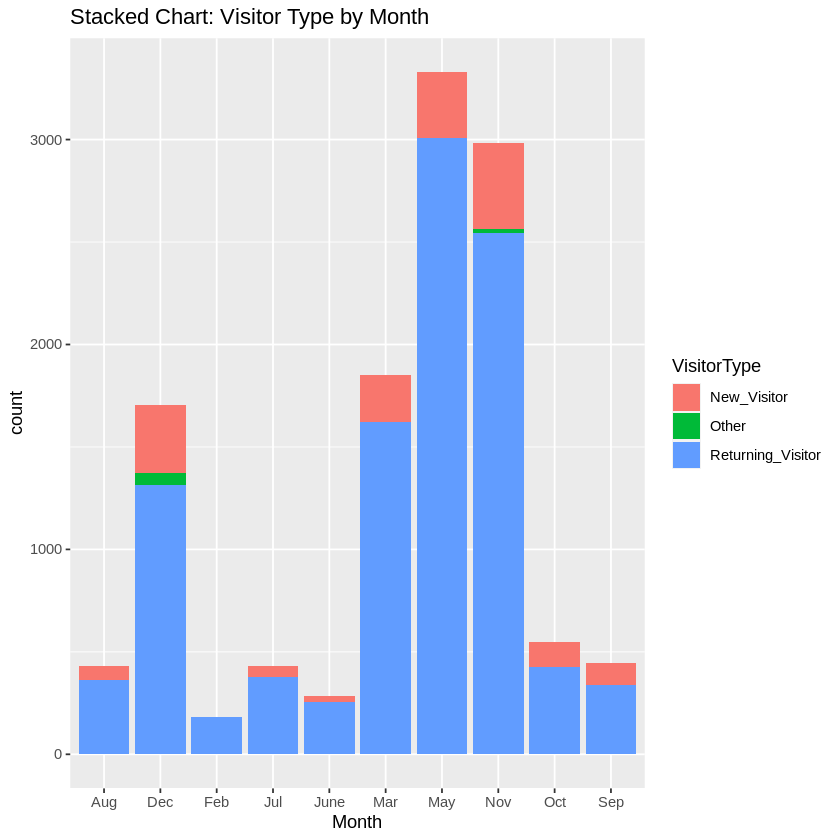

In [48]:
# Stacked bar chart: Visitor Type vs Month
commerce %>%
    ggplot(aes(Month)) +
    geom_bar(aes(fill = VisitorType))+
    labs(title = "Stacked Chart: Visitor Type by Month")

December is the only month with other type of customers,while May has the most amount of returning customers in its website,followed by November and March.

The company should investigate who the other type of customers are.

New visitors are mostly recorded in the month of November.

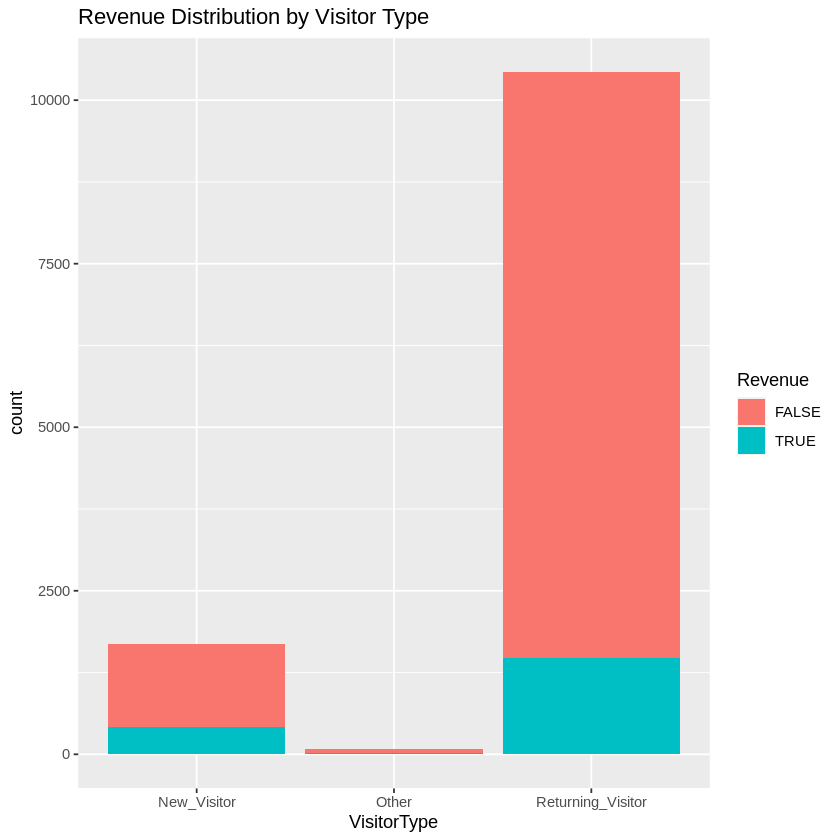

In [51]:
ggplot(commerce, aes(x=VisitorType)) + geom_bar(aes(fill=Revenue))+labs(title='Revenue Distribution by Visitor Type')

Returning visitors are the biggest generator of the income

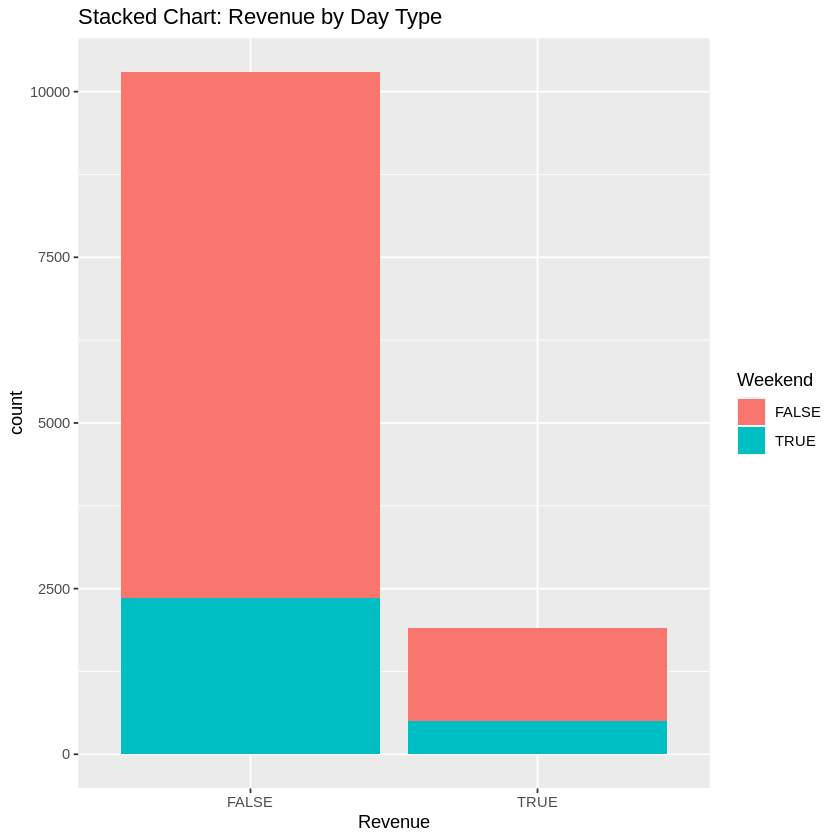

In [54]:
# Stacked bar chart: Revenue vs Day Type
commerce %>%
    ggplot(aes(Revenue)) +
    geom_bar(aes(fill = Weekend))+
    labs(title = "Stacked Chart: Revenue by Day Type")

Most of the sales are performed during weekdays compared to weekends.

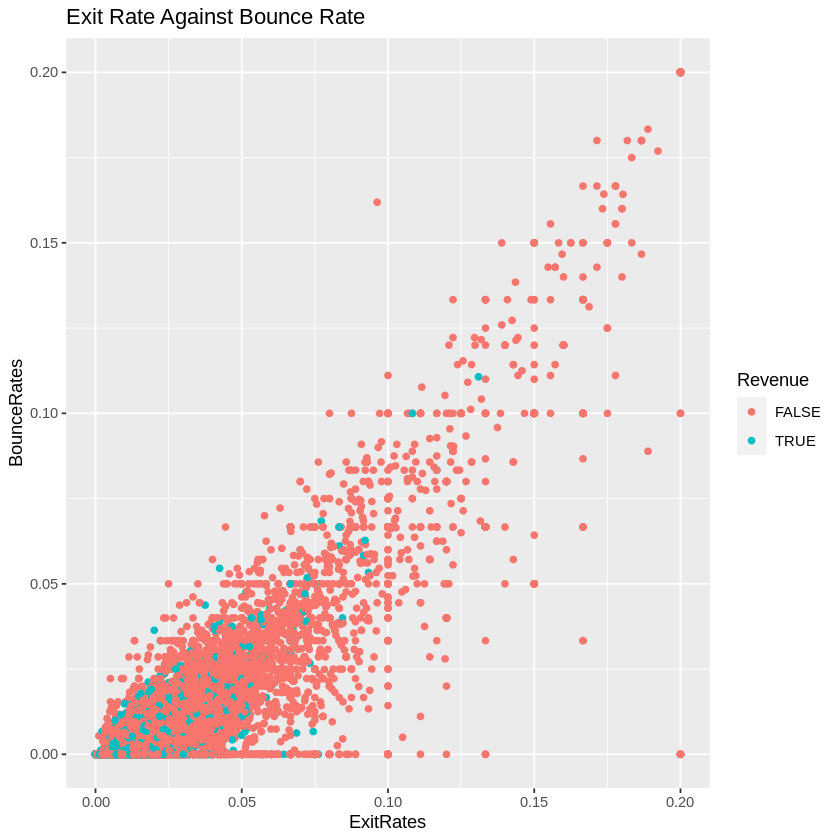

In [55]:
ggplot(commerce, aes(x=ExitRates,
                            y = BounceRates )) + geom_point(aes(colour= `Revenue`))+labs(title='Exit Rate Against Bounce Rate')

Users with lower bounce rates and exit rates seem to be the ones bringing in the revenue as these variables increase the revenue comes close to null.

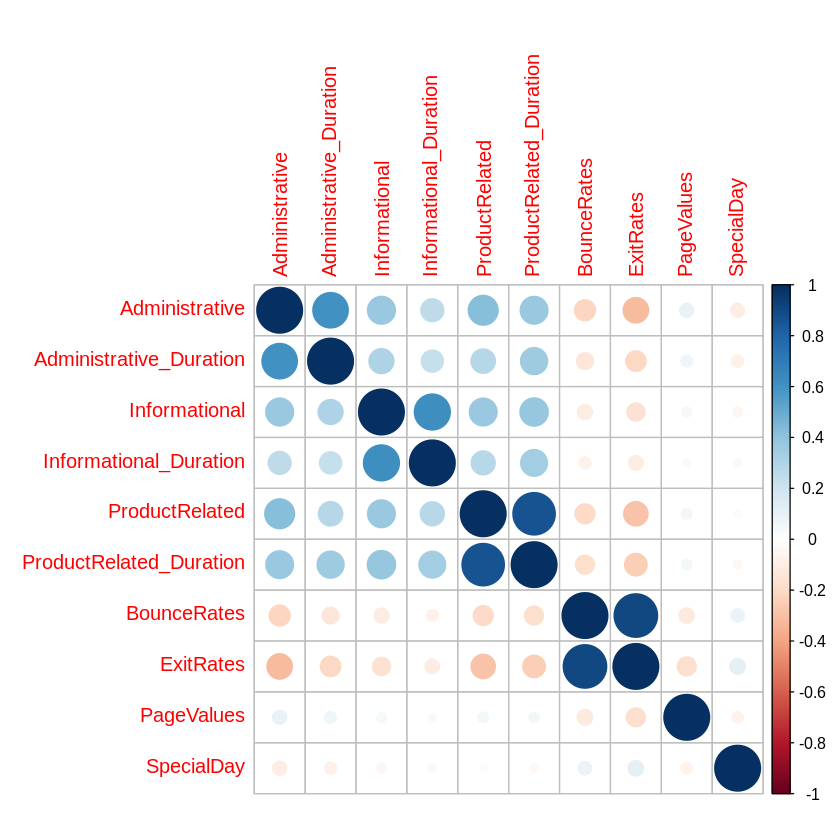

In [58]:
# calculate correlations
correlations <- cor(commerce[,1:10])
# create correlation plot
corrplot(correlations)

**FEATURE ENGINEERING**

In [59]:
# I encoded the Month,VisitorType and Weekend Variabls using one-hot encoding
library(caret)
data <- select(commerce,c(Month,VisitorType,Weekend,Revenue))
dmy <- dummyVars(" ~ .", data = data, fullRank = T)
data_transformed <- data.frame(predict(dmy, newdata = data))
glimpse(data_transformed)

Rows: 12,199
Columns: 13
$ MonthDec                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthFeb                     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ MonthJul                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthJune                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthMar                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthMay                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthNov                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthOct                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ MonthSep                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ VisitorTypeOther             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ VisitorTypeReturning_Visitor <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ WeekendTRUE                  <dbl> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ RevenueTRUE  

In [ ]:
# Dropping the Revenue Variable, Month VisitorType and Weekend columns after encoding 
commerce <- select(commerce , c(-Revenue,-Month,-VisitorType,-Weekend))

In [62]:
glimpse(commerce)

Rows: 12,199
Columns: 14
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2…
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, 2…
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627.…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05000…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14000…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, 0…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1…
$ Browser                 <dbl> 1, 2, 1, 2, 3, 2, 4, 2, 2, 4, 1, 1, 1, 5, 2, 1…
$ Region       

In [64]:
# I then used the cbind() function to merge my encoded columns with the other columns in my dataset
commerce <- cbind(commerce,data_transformed)
dim(commerce)
glimpse(commerce)

commerce_2 <- commerce
dim(commerce_2)

[1] 12199    40

Rows: 12,199
Columns: 40
$ Administrative               <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ Administrative_Duration      <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0,…
$ Informational                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Informational_Duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0,…
$ ProductRelated               <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7,…
$ ProductRelated_Duration      <dbl> 0.000000, 64.000000, -1.000000, 2.666667,…
$ BounceRates                  <dbl> 0.200000000, 0.000000000, 0.200000000, 0.…
$ ExitRates                    <dbl> 0.200000000, 0.100000000, 0.200000000, 0.…
$ PageValues                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ SpecialDay                   <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0…
$ OperatingSystems             <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2,…
$ Browser                      <dbl> 1, 2, 1, 2, 3, 2, 4, 2, 2, 4, 1, 1, 1, 5,…
$ Region       

[1] 12199    40

###**MODELLING AND EVALUATION**

###**K-NEAREST UNSUPERVISED LEARNING**

In [76]:
glimpse(commerce)

Rows: 12,199
Columns: 30
$ Administrative               <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ Administrative_Duration      <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0,…
$ Informational                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Informational_Duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0,…
$ ProductRelated               <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7,…
$ ProductRelated_Duration      <dbl> 0.000000, 64.000000, -1.000000, 2.666667,…
$ BounceRates                  <dbl> 0.200000000, 0.000000000, 0.200000000, 0.…
$ ExitRates                    <dbl> 0.200000000, 0.100000000, 0.200000000, 0.…
$ PageValues                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ SpecialDay                   <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0…
$ OperatingSystems             <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2,…
$ Browser                      <dbl> 1, 2, 1, 2, 3, 2, 4, 2, 2, 4, 1, 1, 1, 5,…
$ Region       

In [77]:
online_shoppers <- select(commerce , -RevenueTRUE.1)
dim(online_shoppers)
# Creating a Normalizing Function
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
# Applying the Normalization function to the data
online_shoppers<- normalize(online_shoppers)
head(online_shoppers)

[1] 12199    29

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,MonthMay,MonthNov,MonthOct,MonthSep,VisitorTypeOther,VisitorTypeReturning_Visitor,WeekendTRUE,RevenueTRUE,MonthDec.1,MonthFeb.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05,1.563122e-05,1.875747e-05,1.875747e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05
2,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,4.689367e-05,1.016029e-03,1.563122e-05,1.719434e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05
3,1.563122e-05,0.000000e+00,1.563122e-05,0.000000e+00,3.126245e-05,0.000000e+00,1.875747e-05,1.875747e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05
4,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,4.689367e-05,5.731448e-05,1.641278e-05,1.781959e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05
5,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,1.719434e-04,9.824223e-03,1.594385e-05,1.641278e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05,1.563122e-05,3.126245e-05
6,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-04,2.426226e-03,1.587803e-05,1.601515e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05


[1] 11.1467709  5.2449423  3.2181505  2.2584209  1.4683065  1.1604261
 [7]  0.9693232  0.8543646  0.7680419  0.7237365  0.4004519  0.3817141
[13]  0.3486834  0.3268707  0.3185429

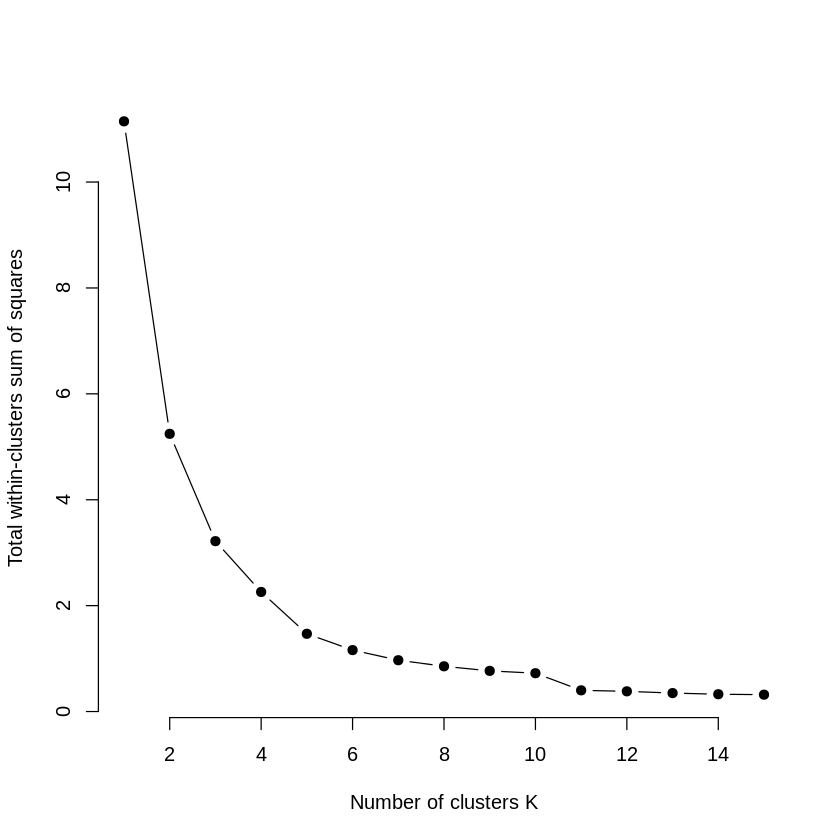

In [79]:
#Finding the optimal value of k
#Elbow Method for finding the optimal number of clusters
set.seed(1123)
# Compute and plot wss for k = 2 to k = 15.
k.max <- 15
data <- online_shoppers
wss <- sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 1000 , algorithm="Lloyd" )$tot.withinss})
wss
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")


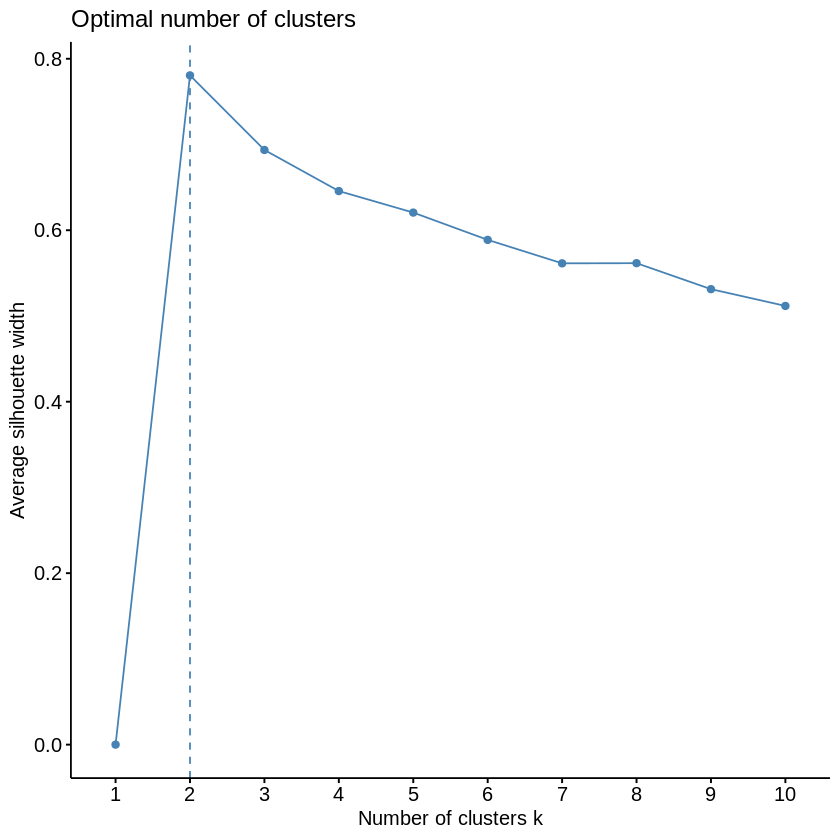

In [80]:
#The Silhouette Method
library(factoextra)
library(cluster)
fviz_nbclust(online_shoppers, kmeans, method='silhouette')

In [81]:
# finding the optimal clusters as 2,we then apply it
result<- kmeans(online_shoppers,2) 
# Previewing the no. of records in each cluster
result$size 

[1]   931 11268

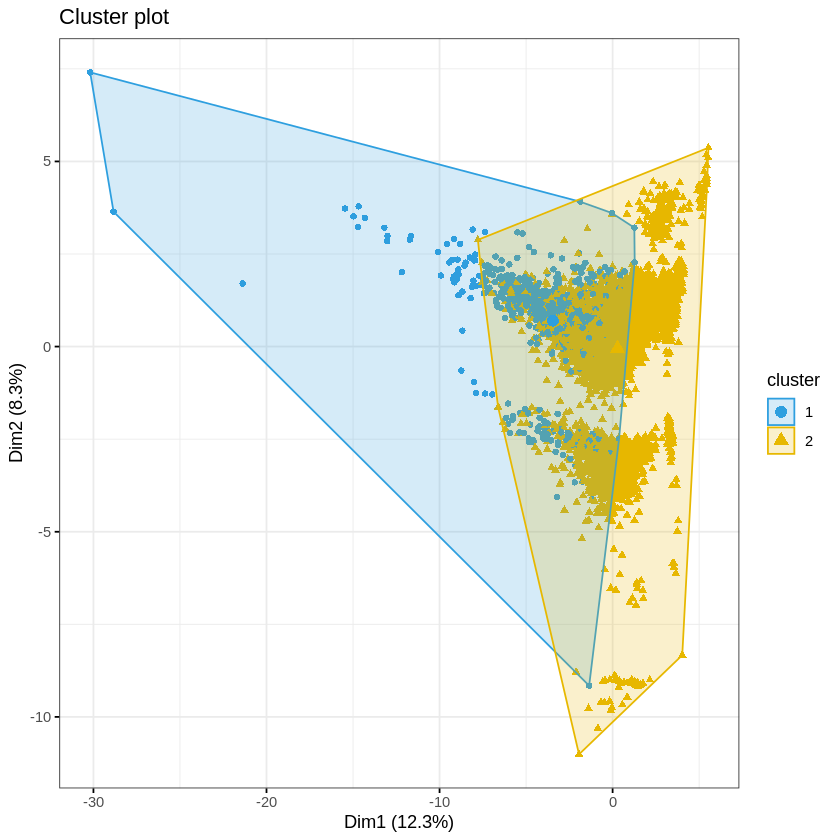

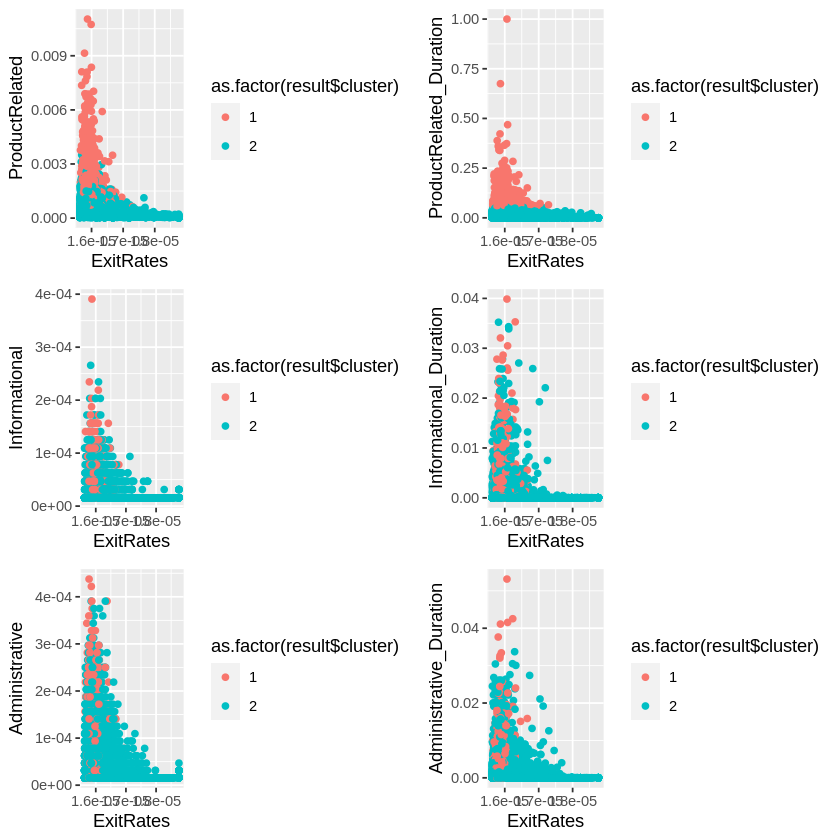

In [82]:
# Plotting the Clusters
#There were two clusters of size 931 and 11268 .


#I then used the fviz_cluster in the factoextra package to plot the clusters of my data as seen here.


fviz_cluster(result, data = online_shoppers,
             palette = c("#2E9FDF","#E7B800"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             )


# plotted the clusters using select features from my dataset.

p1 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = ExitRates, 
                                  y = ProductRelated, 
                                  colour = as.factor(result$cluster)))
p2 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = ExitRates, 
                                  y = ProductRelated_Duration, 
                                  colour = as.factor(result$cluster)))
p3 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = ExitRates, 
                                  y = Informational, 
                                  colour = as.factor(result$cluster)))
p4 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = ExitRates, 
                                  y = Informational_Duration, 
                                  colour = as.factor(result$cluster)))
p5 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = ExitRates, 
                                  y = Administrative, 
                                  colour = as.factor(result$cluster)))
p6 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = ExitRates, 
                                  y = Administrative_Duration, 
                                  colour = as.factor(result$cluster)))
figure <- ggarrange(p1, p2, p3, p4 , p5,p6 ,
                    ncol = 2, nrow = 3)+labs('Clusters of Exit Rate')
figure



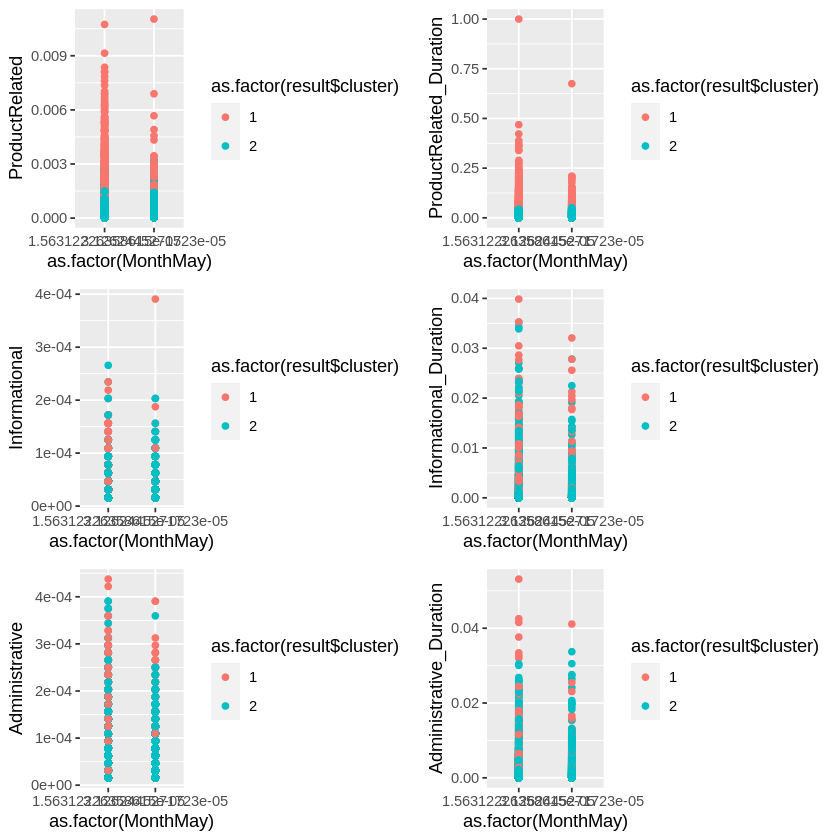

In [84]:
#I plotted clusters for the pages the clients visited and the exit rates , I noted that:

#Many of the users in the first cluster spent more time in the Product Related pages .

#However on the other Pages , there wasn't a clear distinction on the clusters.

#I also plotted the Month May variable against the pages

p1 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = as.factor(MonthMay), 
                                  y = ProductRelated, 
                                  colour = as.factor(result$cluster)))
p2 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = as.factor(MonthMay), 
                                  y = ProductRelated_Duration, 
                                  colour = as.factor(result$cluster)))
p3 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = as.factor(MonthMay), 
                                  y = Informational, 
                                  colour = as.factor(result$cluster)))
p4 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = as.factor(MonthMay), 
                                  y = Informational_Duration, 
                                  colour = as.factor(result$cluster)))
p5 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = as.factor(MonthMay), 
                                  y = Administrative, 
                                  colour = as.factor(result$cluster)))
p6 <- ggplot() + geom_point(data = online_shoppers, 
             mapping = aes(x = as.factor(MonthMay), 
                                  y = Administrative_Duration, 
                                  colour = as.factor(result$cluster)))
figure <- ggarrange(p1, p2, p3, p4 , p5,p6 ,
                    ncol = 2, nrow = 3)+labs('Clusters of Month May')
figure

#From these clusters , there is a clear distinction between cluster one and cluster two in the Product Related columns.

**Hierarchical Clustering**

In [87]:
install.packages("ggdendro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



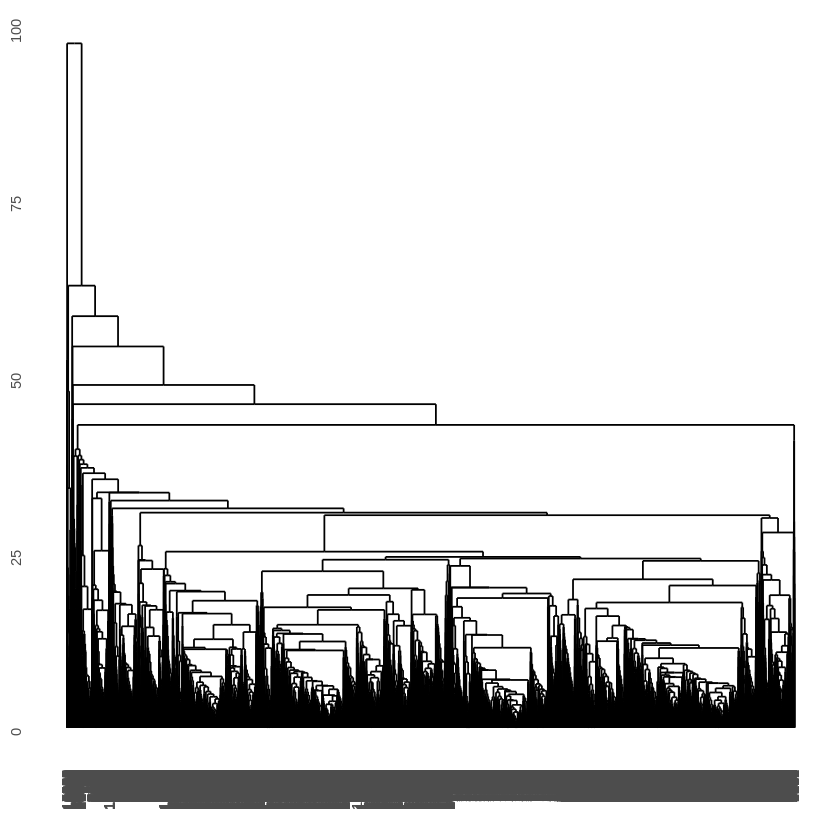

In [97]:
library("ggdendro")
commerce_2 <- na.omit(commerce_2)
clust <- scale(commerce_2)
d <- dist(as.matrix(clust) , method = 'manhattan')
#hc <- hclust(d, method = "ward.D2
library(flashClust)
cl <- flashClust(d, method = "average")
ggdendrogram(cl)
#ggdendrogram(hc)
#clustergram(online_shoppers, k.range = 2:8, line.width = 0.004)


The diagram was pretty difficult to interpret,thus could not be used to interpret it.

### **Challenging the Solution.**

 ### **DBSCAN CLUSTERING**

In [90]:
install.packages("dbscan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message in dbscan(clust, eps = 1, MinPts = 50):
“converting argument MinPts (fpc) to minPts (dbscan)!”


DBSCAN clustering for 12199 objects.
Parameters: eps = 1, minPts = 50
The clustering contains 4 cluster(s) and 11609 noise points.

    0     1     2     3     4 
11609   220   134   142    94 

Available fields: cluster, eps, minPts


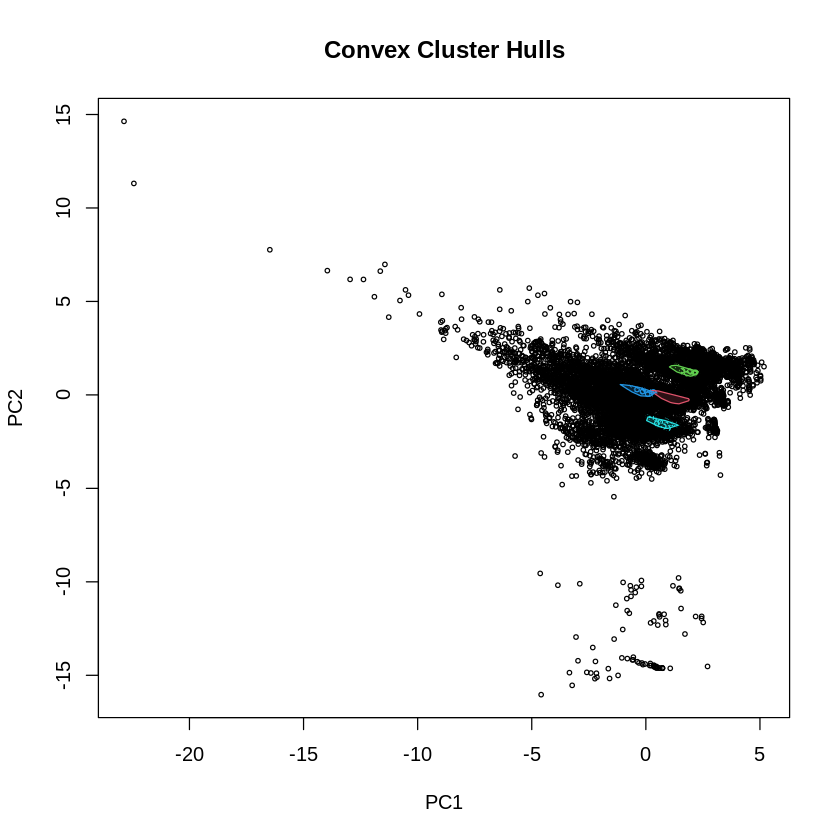

In [91]:
library(dbscan)
db<-dbscan(clust,eps=1,MinPts = 50 )
print(db)
hullplot(clust,db$cluster)
  

Many of the points in the DBSCAN clustering were recorder as noise , therefore this may not be the best , clustering method to use while classifying this particular dataset.



### 8. Conclusions and Recommendations

The team should purpose to collect better and more data , as the dataset had a large number of outliers , was very skewed and leptokurtic. I believe that more data would have made the dataset better.

From my analysis , I noted that the months that recorded the most activity were November, May , October and November. 
Furthermore the ProductRelated pages had more traffic compared to the Informational and Administrative pages. 

Therefore I would recommend that the company focus their attention to their customers more on the months of May , November ,October and December.
They should also emphasize more on the Product related pages as these seem to have more traffic.

The site also seems to make more revenue on days that are not closely related to Special Days .Users with lower bounce rates and exit rates seem to be the ones bringing in the revenue as these variables increase the revenue comes close to null. Thus the company should also take note of these factors.